In [2]:
import numpy as np


def smooth_filter(arr, size=5):
    """
    Apply a strict nanmean filter to a 2D array:
    - For each point, if more than one of the neighbors is NaN, return NaN.
    - Otherwise, return the nanmean of neighbors.
    
    Parameters:
        arr: 2D numpy array
        size: int, either 5 (cross-shaped) or 9 (3x3 square)
    
    Returns:
        2D numpy array with the filter applied.
    """
    arr = np.asarray(arr)
    if arr.ndim != 2:
        raise ValueError("Input array must be 2-dimensional.")
    if size not in (5, 9):
        raise ValueError("Size must be 5 or 9.")

    result = arr.copy()
    nrows, ncols = arr.shape

    for i in range(nrows):
        for j in range(ncols):
            if np.isnan(arr[i, j]):
                continue
            neighbors = []

            if size == 5:
                coords = [(i, j),
                          (i-1, j), (i+1, j),
                          (i, j-1), (i, j+1)]
            elif size == 9:
                coords = [(ii, jj)
                          for ii in range(i-1, i+2)
                          for jj in range(j-1, j+2)]

            for ii, jj in coords:
                if 0 <= ii < nrows and 0 <= jj < ncols:   #A way to deal with the borders
                    neighbors.append(arr[ii, jj])
                else:
                    neighbors.append(np.nan)

            if np.isnan(neighbors).sum() > 2:
                result[i, j] = np.nan
            else:
                result[i, j] = np.nanmean(neighbors)

    return result

In [3]:
work_place = "hydra" # 'hydra', 'ubuntu' or 'win'
if work_place == 'hydra':
    base_path = r'/home/jorge.gacitua/salidas/L96_multiple_experiments/data/LETKF'
    output_dir = r'/home/jorge.gacitua/salidas/L96_multiple_experiments/figures'
elif work_place == 'ubuntu':
    base_path = r'/media/jgacitua/storage/L96_multiple_experiments/data/LETKF'
    output_dir = r'/media/jgacitua/storage/L96_multiple_experiments/figures'
elif work_place == 'win':
    base_path  = r'C:\Users\jyndd\OneDrive\Doctorado\Experimentos\L96_multiple_experiments\data\LETKF'
    output_dir = r'C:\Users\jyndd\OneDrive\Doctorado\Experimentos\L96_multiple_experiments\figures'

Processing file: LETKF_Paper_Nature_Freq4_Den0.5_Type3_ObsErr5_Nens10_NTemp1_alpha2_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den0.5_Type3_ObsErr5_Nens10_NTemp2_alpha2_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den0.5_Type3_ObsErr5_Nens10_NTemp3_alpha2_NOGEC_500_Prespinup200_inf1.2.npz


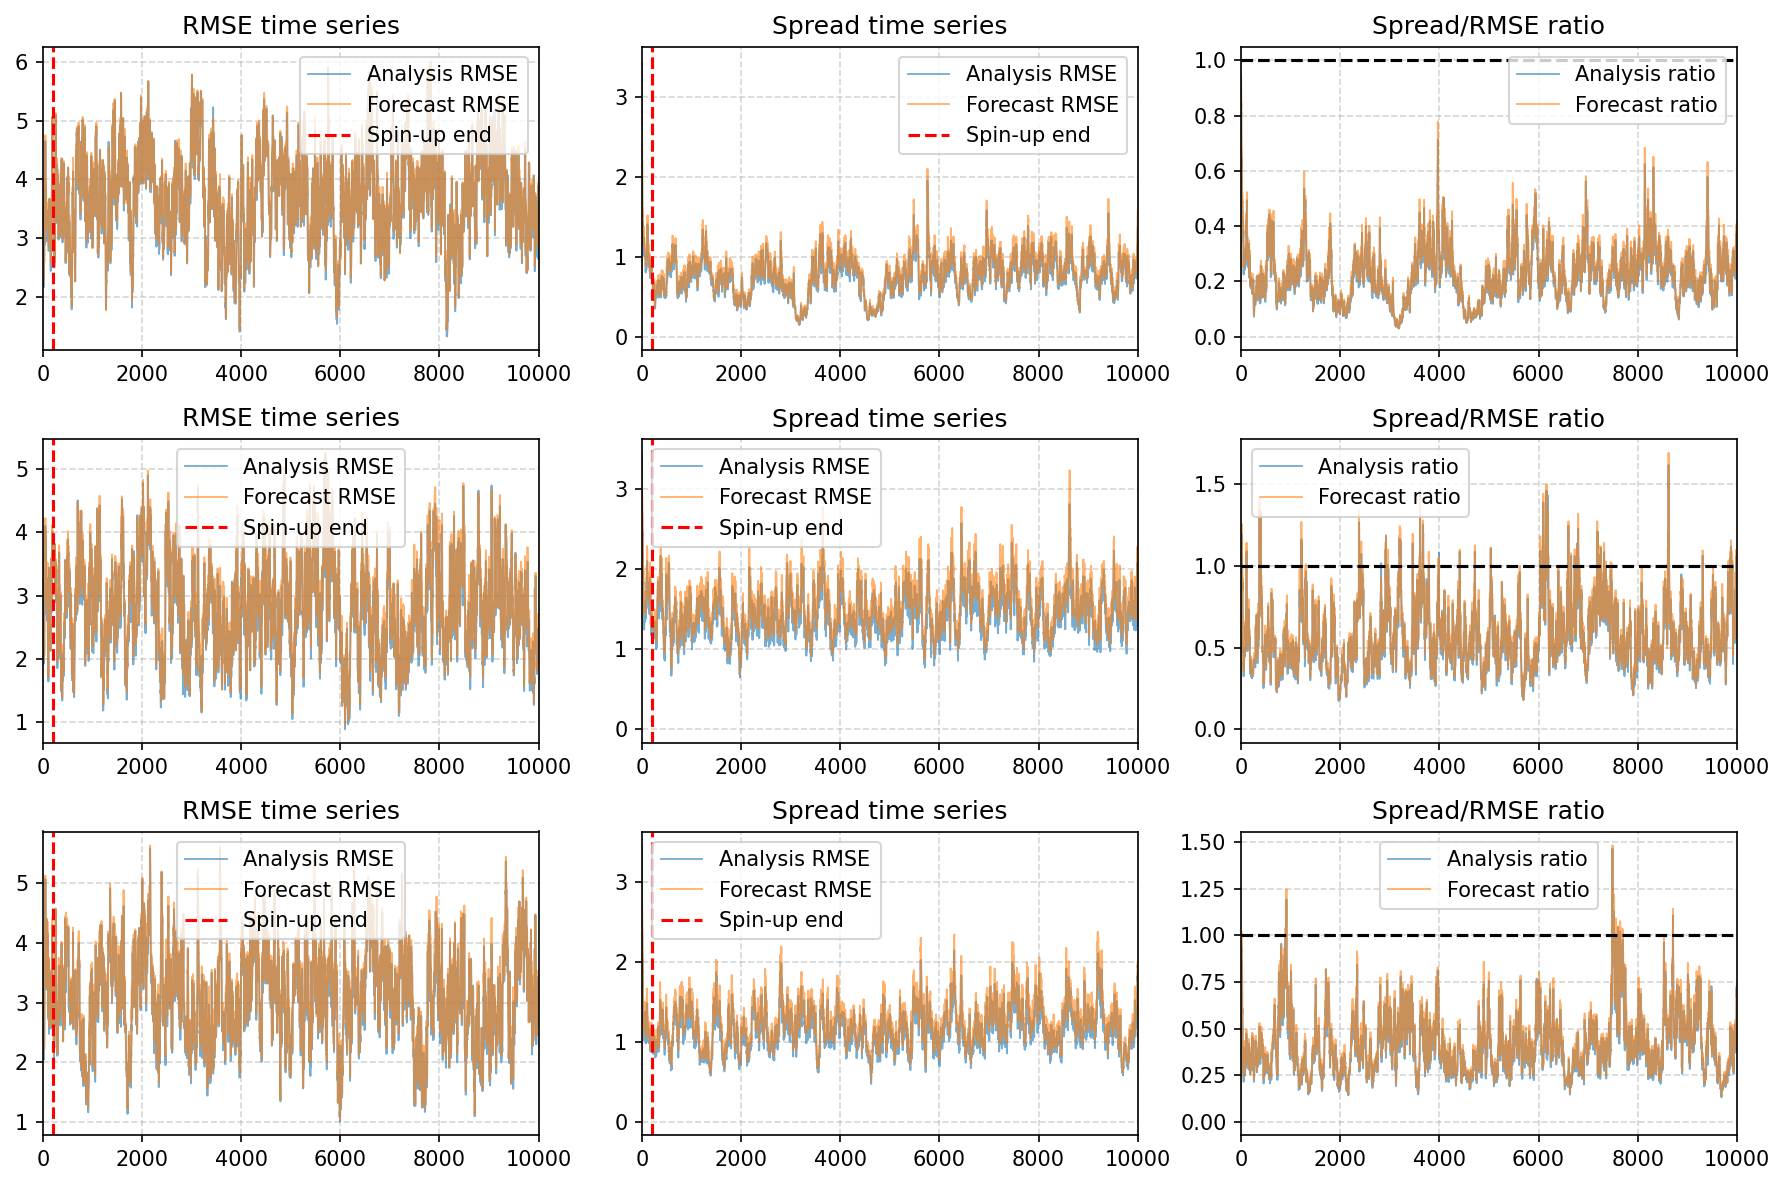

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import os

# === Settings ===

#filename  = "LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens80_NTemp3_alpha2_NOGEC_80k_series.npz"
err = 5
Nens = 10
alpha = 2
prespinup = 200
inflation = 1.2

spinup    = 200   # cycles to discard as spin-up
limit = 10000
fig, axes = plt.subplots(3, 3, figsize=(12, 8), dpi=150)
for i in range(0,3):
    
    filename = f"LETKF_Paper_Nature_Freq4_Den0.5_Type3_ObsErr{err}_Nens{Nens}_NTemp{i+1}_alpha{alpha}_NOGEC_500_Prespinup{prespinup}_inf{inflation}.npz"
    print(f"Processing file: {filename}")
    # === Load file ===
    data = np.load(os.path.join(base_path, filename), allow_pickle=True)
    rmse_a = data["series_analysis_rmse"][0,0,0:limit]
    rmse_f = data["series_forecast_rmse"][0,0,0:limit]
    sprd_a = data["series_analysis_sprd"][0,0,0:limit]
    sprd_f = data["series_forecast_sprd"][0,0,0:limit]

    # === Diagnostics ===
    ratio_a = sprd_a / rmse_a
    ratio_f = sprd_f / rmse_f


    # === Plots ===
    

    # Time series RMSE
    axes[i,0].plot(rmse_a, label="Analysis RMSE", alpha=0.6, linewidth=0.9)
    axes[i,0].plot(rmse_f, label="Forecast RMSE", alpha=0.6, linewidth=0.9)
    axes[i,0].axvline(spinup, color="red", linestyle="--", label="Spin-up end")
    axes[i,0].set_title("RMSE time series")
    axes[i,0].legend()
    axes[i,0].grid(True, linestyle="--", alpha=0.5)
    axes[i,0].set_xlim(0, limit)

    # Time series SPREAD
    axes[i,1].plot(sprd_a, label="Analysis RMSE", alpha=0.6, linewidth=0.9)
    axes[i,1].plot(sprd_f, label="Forecast RMSE", alpha=0.6, linewidth=0.9)
    axes[i,1].axvline(spinup, color="red", linestyle="--", label="Spin-up end")
    axes[i,1].set_title("Spread time series")
    axes[i,1].legend()
    axes[i,1].grid(True, linestyle="--", alpha=0.5)
    axes[i,1].set_xlim(0, limit)

    # Spread/RMSE ratio
    axes[i,2].plot(ratio_a, label="Analysis ratio", alpha=0.6, linewidth=0.9)
    axes[i,2].plot(ratio_f, label="Forecast ratio", alpha=0.6, linewidth=0.9)
    axes[i,2].axhline(1.0, color="black", linestyle="--")
    axes[i,2].set_title("Spread/RMSE ratio")
    axes[i,2].legend()
    axes[i,2].grid(True, linestyle="--", alpha=0.5)
    axes[i,2].set_xlim(0, limit)

plt.tight_layout()
plt.show()


Processing file: LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr0.3_Nens10_NTemp1_alpha0_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr0.3_Nens10_NTemp2_alpha0_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr0.3_Nens10_NTemp3_alpha0_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr0.3_Nens10_NTemp1_alpha1_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr0.3_Nens10_NTemp2_alpha1_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr0.3_Nens10_NTemp3_alpha1_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr0.3_Nens10_NTemp1_alpha2_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr0.3_Nens10_NTemp2_alpha2_NOGEC_500_Prespinup200_inf1.2.npz
Processing file: LETKF_Paper_Nature_Freq

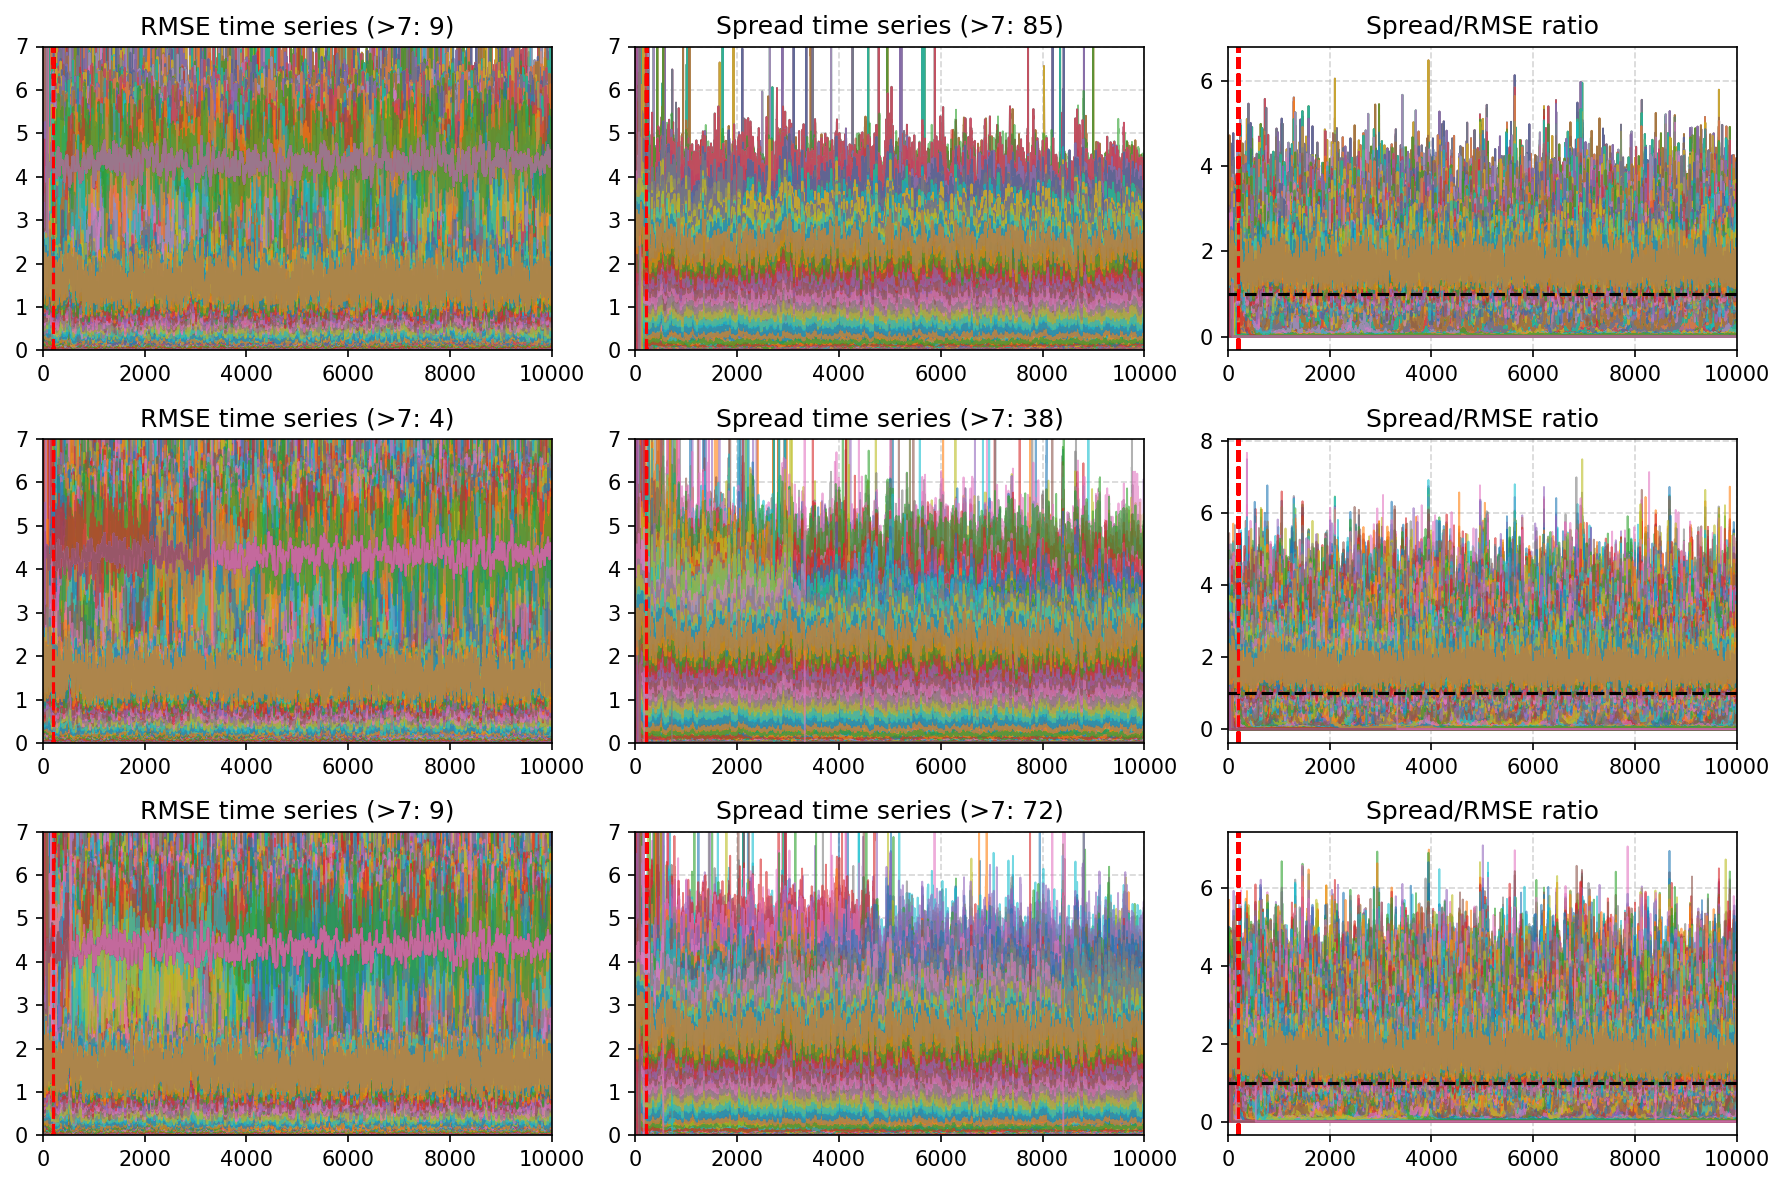

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import os

# === Settings ===

#filename  = "LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens80_NTemp3_alpha2_NOGEC_80k_series.npz"
errs = [0.3,1,5,25]
Nens = [10,20,40,60,80,100]
alphas = [0,1,2,3]
prespinup = 200
inflation = 1.2

spinup    = 200   # cycles to discard as spin-up
limit = 10000
fig, axes = plt.subplots(3, 3, figsize=(12, 8), dpi=150)
y_limit = 7

for err in errs:
    for nen in Nens:
        for alpha in alphas:
            for i in range(0,3):
                filename = f"LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr{err}_Nens{nen}_NTemp{i+1}_alpha{alpha}_NOGEC_500_Prespinup{prespinup}_inf{inflation}.npz"
                print(f"Processing file: {filename}")
                data = np.load(os.path.join(base_path, filename), allow_pickle=True)

                count_rmse_over = 0
                count_sprd_over = 0

                for j in range(13):
                    for k in range(9):
                        rmse_a = data["series_analysis_rmse"][j,k,0:limit]
                        sprd_a = data["series_analysis_sprd"][j,k,0:limit]

                        # Count values over threshold
                        count_rmse_over += np.sum(rmse_a > y_limit)
                        count_sprd_over += np.sum(sprd_a > y_limit)

                        ratio_a = sprd_a / rmse_a

                        axes[i,0].plot(rmse_a, alpha=0.6, linewidth=0.9)
                        axes[i,1].plot(sprd_a, alpha=0.6, linewidth=0.9)
                        axes[i,2].plot(ratio_a, alpha=0.6, linewidth=0.9)

                # RMSE subplot
                axes[i,0].axvline(spinup, color="red", linestyle="--")
                axes[i,0].set_title(f"RMSE time series (>{y_limit}: {count_rmse_over})")
                axes[i,0].grid(True, linestyle="--", alpha=0.5)
                axes[i,0].set_xlim(0, limit)
                axes[i,0].set_ylim(0, y_limit)

                # Spread subplot
                axes[i,1].axvline(spinup, color="red", linestyle="--")
                axes[i,1].set_title(f"Spread time series (>{y_limit}: {count_sprd_over})")
                axes[i,1].grid(True, linestyle="--", alpha=0.5)
                axes[i,1].set_xlim(0, limit)
                axes[i,1].set_ylim(0, y_limit)

                # Ratio subplot
                axes[i,2].axhline(1.0, color="black", linestyle="--")
                axes[i,2].axvline(spinup, color="red", linestyle="--")
                axes[i,2].set_title("Spread/RMSE ratio")
                axes[i,2].grid(True, linestyle="--", alpha=0.5)
                axes[i,2].set_xlim(0, limit)

plt.tight_layout()
plt.show()


In [ ]:
Freq = 4
Den = 1.0
ObseErr = '5'
nens_labels = np.array([10, 20, 40, 60, 80, 100])
alpha_range = np.array([0, 1, 2, 3])
n_alpha = len(alpha_range)
n_nens = len(nens_labels)
best_inflation = np.empty((n_nens, n_alpha, 3))  # 3 methods: LETKF, T2, T3
best_localization = np.empty((n_nens, n_alpha, 3))
rmse_values = np.empty((n_nens, n_alpha,10000,3))  # 3 methods: LETKF, T2, T3
sprd_values = np.empty((n_nens, n_alpha,10000,3))  # 3 methods: LETKF, T2, T3
ratio_values = np.empty((n_nens, n_alpha,10000,3))  # 3 methods: LETKF, T2, T3


for k, method_idx in enumerate([0, 1, 2]):  # LETKF, T2, T3
    for iens, nens in enumerate(nens_labels):
        for ialpha, alpha in enumerate(alpha_range):
            filename = f"LETKF_Paper_Nature_Freq{Freq}_Den{Den}_Type3_ObsErr{ObseErr}_Nens{nens}_NTemp{method_idx+1}_alpha{alpha}_NOGEC_500_Prespinup200_inf1.2.npz"
            filepath = os.path.join(base_path, filename)

            if os.path.exists(filepath):
                data = np.load(filepath, allow_pickle=True)
                rmse = data['total_analysis_rmse']
                sprd = data['total_analysis_sprd']
                NormalEnd = 1 - data['NormalEnd']
                NormalEnd = NormalEnd.astype(bool)
                rmse[NormalEnd] = np.nan
                sprd[NormalEnd] = np.nan
                #rmse = cf.outlier_rmse_filter(rmse)

                # Apply smoothing
                rmse_smooth = smooth_filter(rmse, size=5)
                sprd_smooth = smooth_filter(sprd, size=5)
                ratio = sprd_smooth/rmse_smooth 
                min_idx = np.nanargmin(rmse_smooth)
                inf_idx, loc_idx = np.unravel_index(min_idx, ratio.shape)
                
                rmse_values[iens, ialpha,:, k] = data['series_analysis_rmse'][inf_idx, loc_idx, :]
                sprd_values[iens, ialpha,:, k] = data['series_analysis_sprd'][inf_idx, loc_idx, :]
                ratio_values[iens, ialpha,:, k] = rmse_values[iens, ialpha,:, k] / sprd_values[iens, ialpha,:, k]
            else:
                print(f"File not found: {filepath}")
                best_inflation[iens, ialpha, k] = np.nan
                best_localization[iens, ialpha, k] = np.nan
                rmse_values[iens, ialpha, k] = np.nan


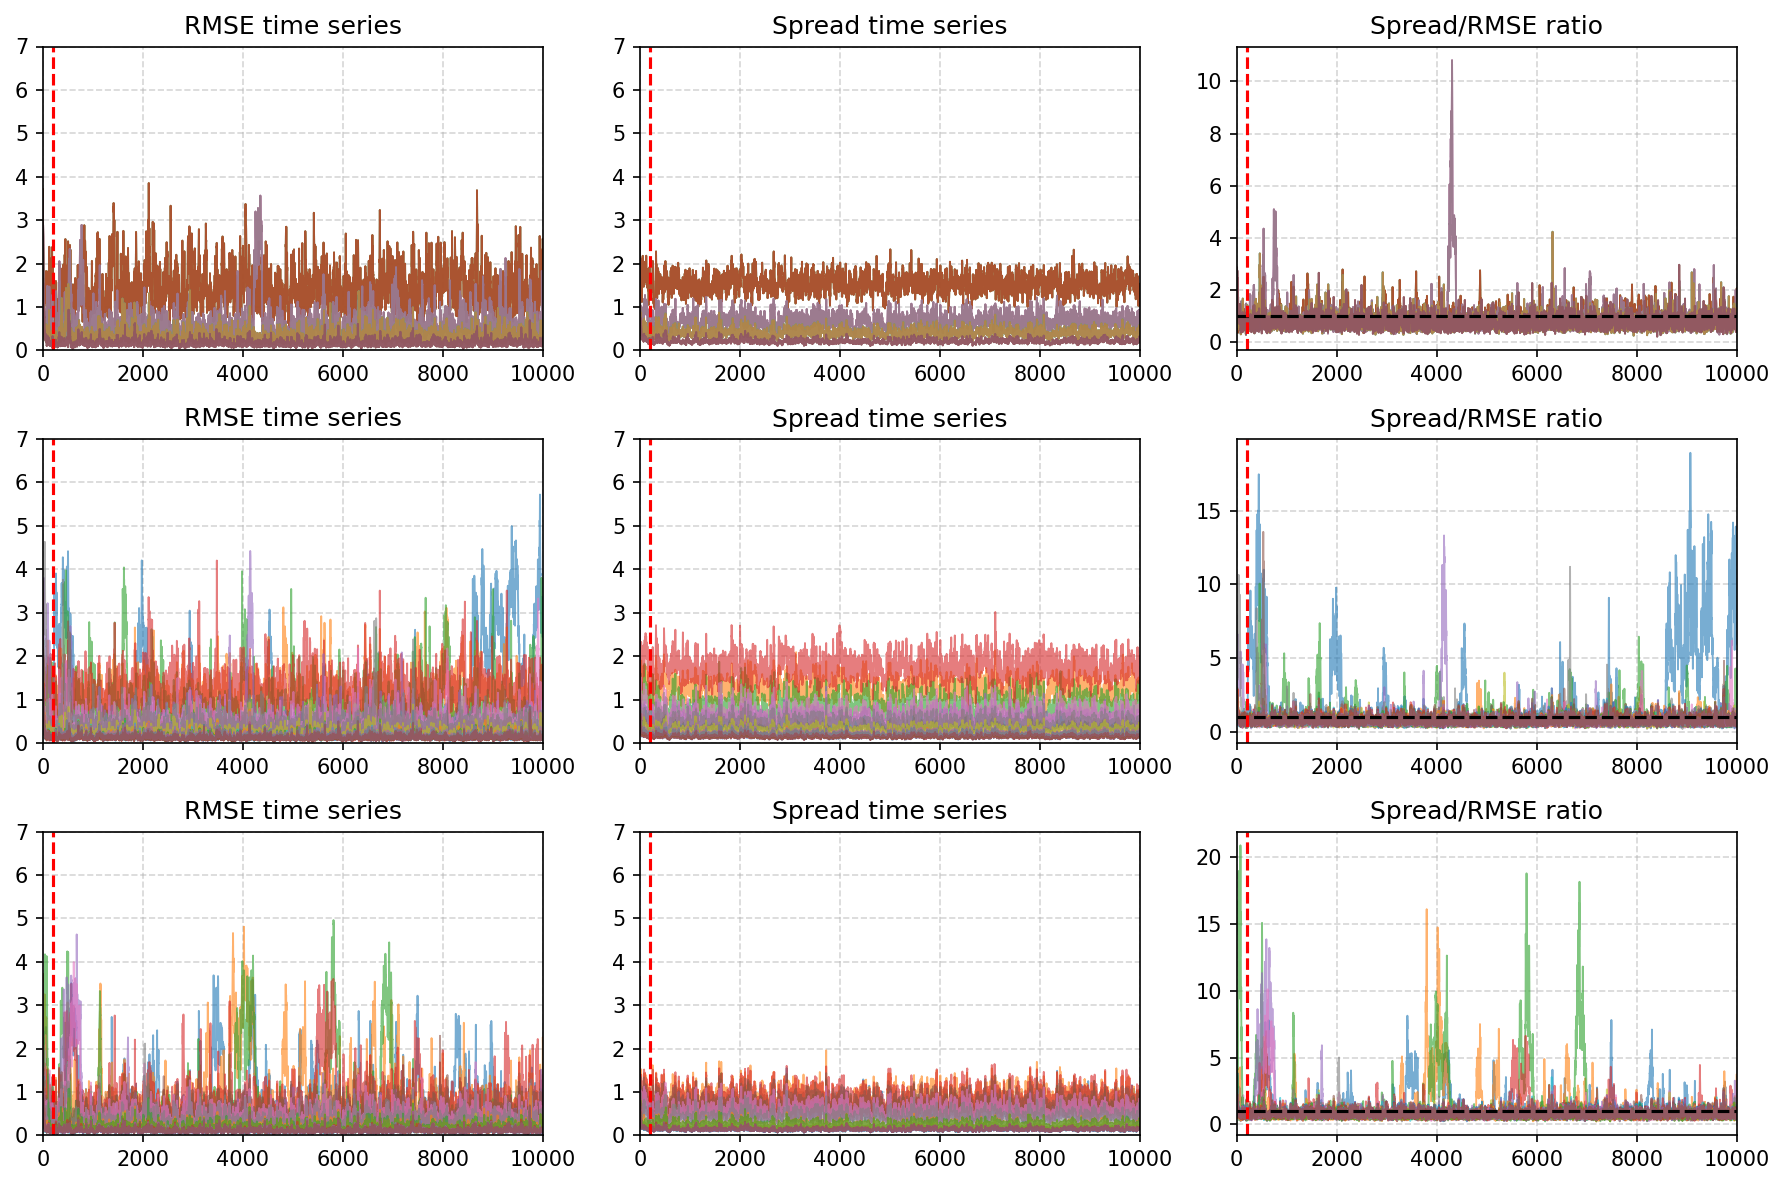

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import os

# === Settings ===

spinup    = 200   # cycles to discard as spin-up
limit = 10000
fig, axes = plt.subplots(3, 3, figsize=(12, 8), dpi=150)
y_limit = 7

for i in range(0,3):

    for j in range(len(nens_labels)):
        for k in range(len(alpha_range)):

            axes[i,0].plot(rmse_values[j,k,:,i], alpha=0.6, linewidth=0.9)
            axes[i,1].plot(sprd_values[j,k,:,i], alpha=0.6, linewidth=0.9)
            axes[i,2].plot(ratio_values[j,k,:,i], alpha=0.6, linewidth=0.9)

    # RMSE subplot
    axes[i,0].axvline(spinup, color="red", linestyle="--")
    axes[i,0].set_title(f"RMSE time series")
    axes[i,0].grid(True, linestyle="--", alpha=0.5)
    axes[i,0].set_xlim(0, limit)
    axes[i,0].set_ylim(0, y_limit)

    # Spread subplot
    axes[i,1].axvline(spinup, color="red", linestyle="--")
    axes[i,1].set_title(f"Spread time series")
    axes[i,1].grid(True, linestyle="--", alpha=0.5)
    axes[i,1].set_xlim(0, limit)
    axes[i,1].set_ylim(0, y_limit)

    # Ratio subplot
    axes[i,2].axhline(1.0, color="black", linestyle="--")
    axes[i,2].axvline(spinup, color="red", linestyle="--")
    axes[i,2].set_title("Spread/RMSE ratio")
    axes[i,2].grid(True, linestyle="--", alpha=0.5)
    axes[i,2].set_xlim(0, limit)

plt.tight_layout()
plt.show()


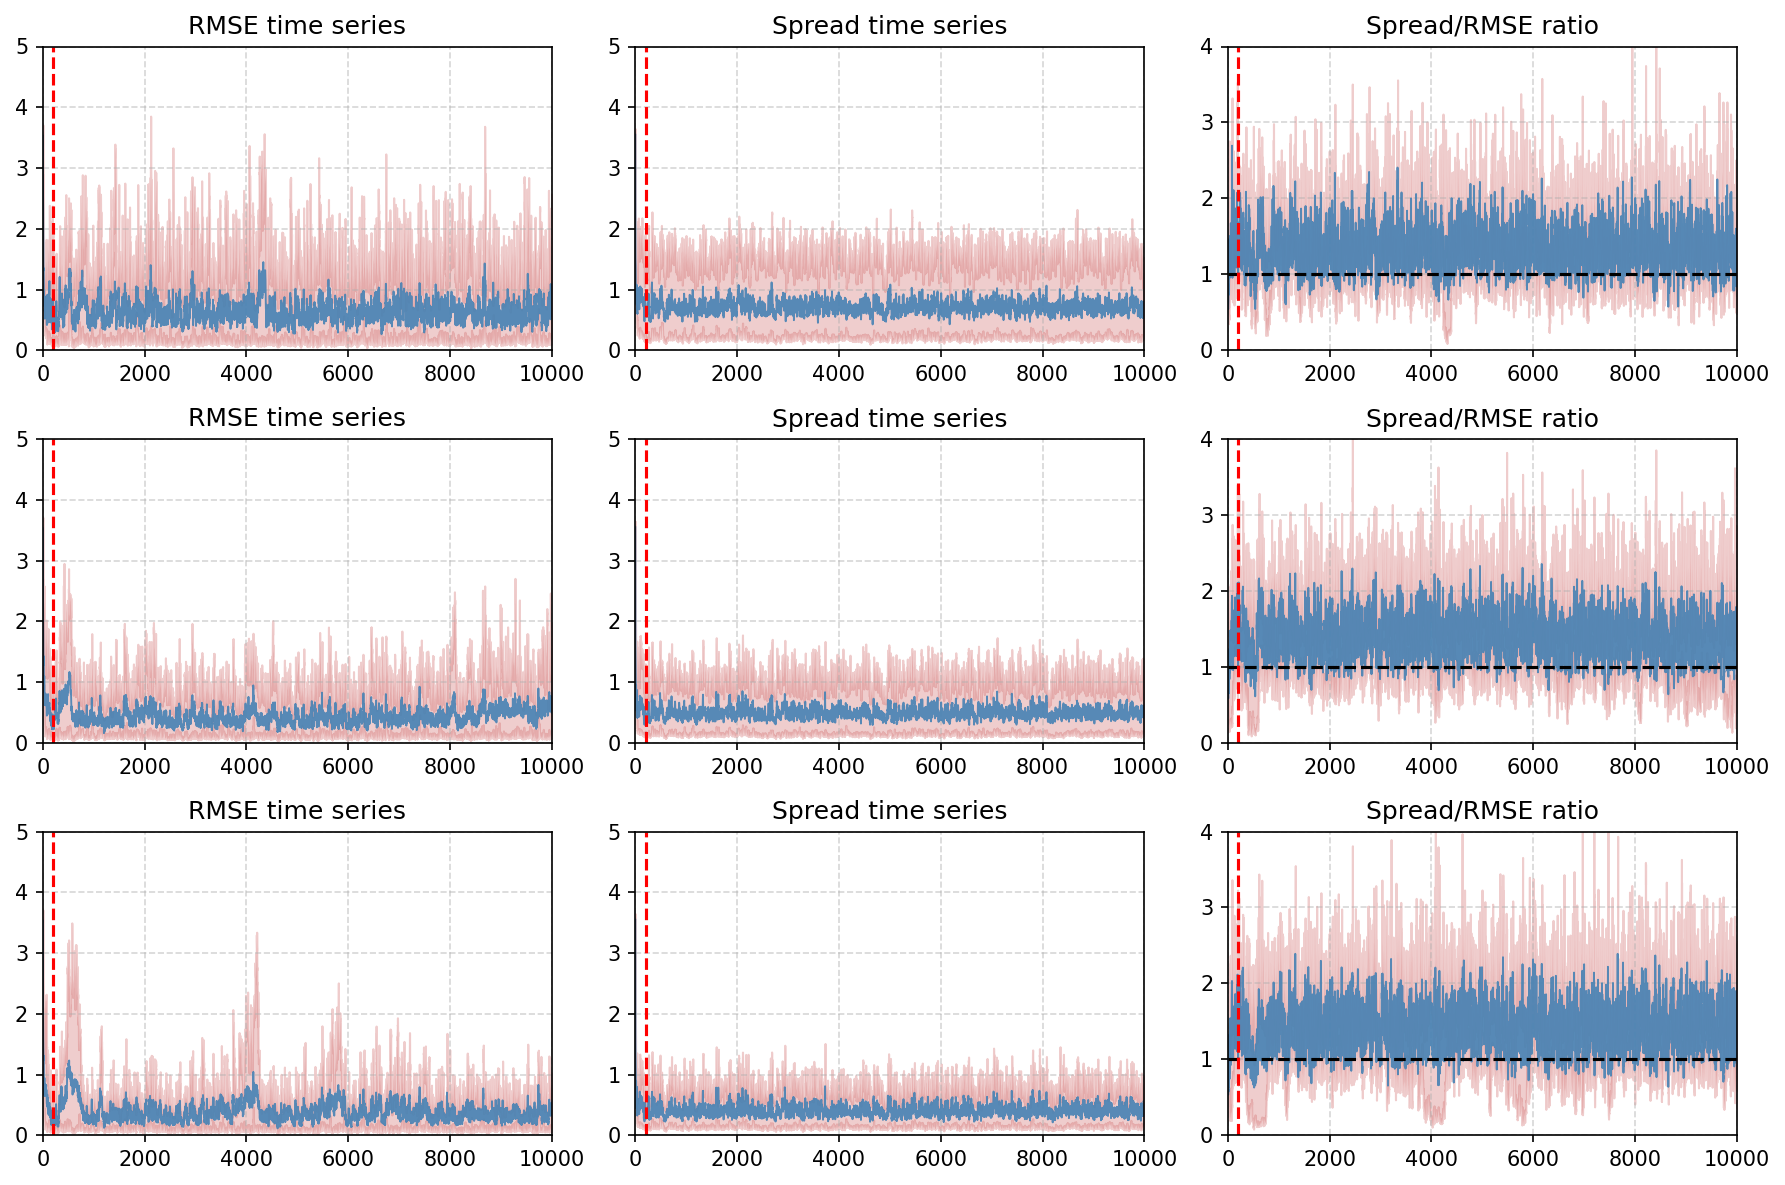

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import os

# === Settings ===

spinup    = 200   # cycles to discard as spin-up
limit = 10000
fig, axes = plt.subplots(3, 3, figsize=(12, 8), dpi=150)
y_limit = 5

for i in range(0,3):

    rmse_mean = np.nanmean(rmse_values[:,:,:,i],axis=(0,1))
    #rmse_std  = np.nanstd(rmse_values[:,:,:,i],axis=(0,1))
    rmse_p05  = np.percentile(rmse_values[:,:,:,i],10,axis=(0,1))
    rmse_p95  = np.percentile(rmse_values[:,:,:,i],90,axis=(0,1))

    sprd_mean = np.nanmean(sprd_values[:,:,:,i],axis=(0,1))
    sprd_std  = np.nanstd(sprd_values[:,:,:,i],axis=(0,1))
    sprd_p05  = np.percentile(sprd_values[:,:,:,i],10,axis=(0,1))
    sprd_p95  = np.percentile(sprd_values[:,:,:,i],90,axis=(0,1))

    ratio_mean = np.nanmean(sprd_values[:,:,:,i]/rmse_values[:,:,:,i],axis=(0,1))
    ratio_std  = np.nanstd(sprd_values[:,:,:,i]/rmse_values[:,:,:,i],axis=(0,1))
    ratio_p05  = np.percentile(sprd_values[:,:,:,i]/rmse_values[:,:,:,i],5,axis=(0,1))
    ratio_p95  = np.percentile(sprd_values[:,:,:,i]/rmse_values[:,:,:,i],95,axis=(0,1))

    axes[i,0].plot(rmse_mean,  alpha=0.9, linewidth=0.9, color="SteelBlue")
    axes[i,1].plot(sprd_mean,  alpha=0.9, linewidth=0.9, color="SteelBlue")
    axes[i,2].plot(ratio_mean, alpha=0.9, linewidth=0.9, color="SteelBlue")
 
    #axes[i,0].fill_between(range(10000),rmse_mean-rmse_std,rmse_mean+rmse_std,color="IndianRed")
    axes[i,0].fill_between(range(10000),rmse_p05,rmse_p95,color="IndianRed", alpha=0.3)
    axes[i,1].fill_between(range(10000),sprd_p05,sprd_p95,color="IndianRed", alpha=0.3)
    axes[i,2].fill_between(range(10000),ratio_p05,ratio_p95,color="IndianRed", alpha=0.3)

    # RMSE subplot
    axes[i,0].axvline(spinup, color="red", linestyle="--")
    axes[i,0].set_title(f"RMSE time series")
    axes[i,0].grid(True, linestyle="--", alpha=0.5)
    axes[i,0].set_xlim(0, limit)
    axes[i,0].set_ylim(0, y_limit)

    # Spread subplot
    axes[i,1].axvline(spinup, color="red", linestyle="--")
    axes[i,1].set_title(f"Spread time series")
    axes[i,1].grid(True, linestyle="--", alpha=0.5)
    axes[i,1].set_xlim(0, limit)
    axes[i,1].set_ylim(0, y_limit)

    # Ratio subplot
    axes[i,2].axhline(1.0, color="black", linestyle="--")
    axes[i,2].axvline(spinup, color="red", linestyle="--")
    axes[i,2].set_title("Spread/RMSE ratio")
    axes[i,2].grid(True, linestyle="--", alpha=0.5)
    axes[i,2].set_xlim(0, limit)
    axes[i,2].set_ylim(0, 4)

plt.tight_layout()
plt.show()
